In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [9]:
target = pd.DataFrame(iris['target'],columns=['target'])

In [15]:
df1 = pd.merge(df,target,how='inner',on=df.index)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
df1.drop(['key_0'],axis=1,inplace=True)

In [23]:
df1.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [26]:
df1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [27]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Univariate Analysis

In [29]:
setosa = df1.loc[df1['target']==0]
versicolor = df1.loc[df1['target']==1]
virginica = df1.loc[df1['target']==2]


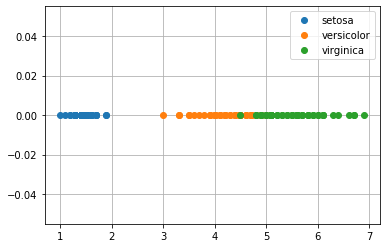

In [35]:
plt.grid()
plt.plot(setosa['petal length (cm)'],np.zeros_like(setosa['petal length (cm)']),'o')
plt.plot(versicolor['petal length (cm)'],np.zeros_like(versicolor['petal length (cm)']),'o')
plt.plot(virginica['petal length (cm)'],np.zeros_like(virginica['petal length (cm)']),'o')
plt.legend(['setosa', 'versicolor', 'virginica'])

from this plot we can observe that using petal length (cm) alone we can distinguish clearly setosa species since it is marked in
blue color
the other two species have an overlap of data points hence we will have to try to visualize in higher dimension to see if we can 
linearly seperate all three

2-D scatter plots

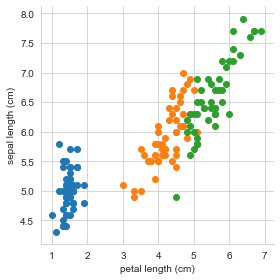

In [44]:
sns.set_style('whitegrid')
sns.FacetGrid(df1,hue='target',height=4).map(plt.scatter,'petal length (cm)','sepal length (cm)')

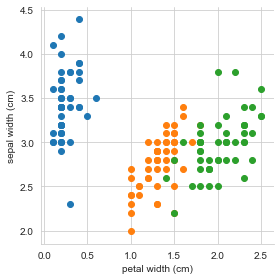

In [45]:
sns.set_style('whitegrid')
sns.FacetGrid(df1,hue='target',height=4)\
    .map(plt.scatter,'petal width (cm)','sepal width (cm)')

From this we can observe that there is an overlap with 'versicolor' and 'virginica'

3-D scatter plot

In [49]:
import plotly.express as px

In [53]:
fig = px.scatter_3d(df1,x='petal length (cm)',y = 'petal width (cm)',z = 'sepal length (cm)',color = 'target')


In [54]:
fig.show()

From the above plot we can see that versicolor has some outliers that are overlapping with virginica

In [55]:
counts,bin_edges =  np.histogram(setosa['petal length (cm)'],bins=10,density = True)
pdf = counts/(sum(counts))

In [57]:
cdf = np.cumsum(pdf)

In [58]:
print(pdf)
print(cdf)

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.48 0.74 0.88 0.96 0.96 1.  ]


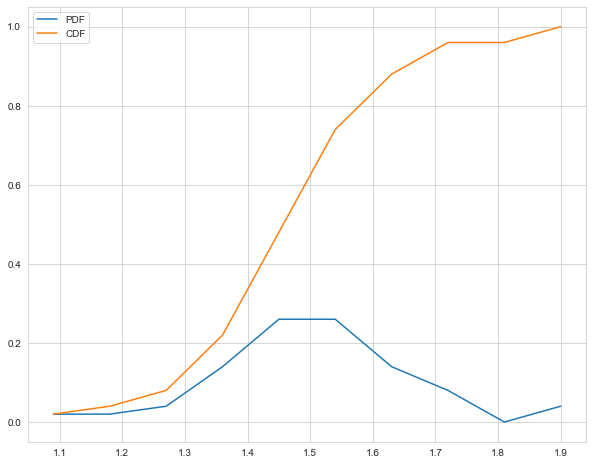

In [67]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF','CDF'])
plt.show()